In [1]:
# Water Treatment Plant Clustering Analysis
# Dataset Reference: https://archive.ics.uci.edu/ml/datasets/Water+Treatment+Plant


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/gauravsharma/Documents/python/Dataset/water-treatment.csv", header = None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [4]:
data.shape

(527, 39)

In [5]:
# Assigning the Column Names

data.columns = ("Date", "Q_E", "ZN_E", "PH_E", "DBO_E", "DQO_E", "SS_E",
    "SSV_E", "SED_E", "COND_E", "PH_P", "DBO_P", "SS_P", "SSV_P", "SED_P", "COND_P",
    "PH_D", "DBO_D", "DQO_D", "SS_D", "SSV_D", "SED_D", "COND_D", "PH_S", "DBO_S",
    "DQO_S", "SS_S", "SSV_S", "SED_S", "COND_S", "RD_DBO_P", "RD_SS_P", "RD_SED_P",
    "RD_DBO_S", "RD_DQO_S", "RD_DBO_G", "RD_DQO_G", "RD_SS_G", "RD_SED_G")

In [6]:
data.head()

,Date,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [7]:
# Cleaning the dataset

In [8]:
# Replacing the "?" with null values

data.replace("?", np.nan, inplace = True)
data.head()

,Date,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
0,D-1/3/90,44101,1.50,7.8,NaN,407,166,66.3,4.5,2110,...,2000,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,NaN,443,214,69.2,6.5,2660,...,2590,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,NaN,528,186,69.9,3.4,1666,...,1888,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


In [9]:
# To process further, conveting the dataset type to float

data['Q_E'] = data['Q_E'].astype(float)
data['ZN_E'] = data['ZN_E'].astype(float)
data['DBO_E'] = data['DBO_E'].astype(float)
data['DQO_E'] = data['DQO_E'].astype(float)
data['SS_E'] = data['SS_E'].astype(float)
data['SSV_E'] = data['SSV_E'].astype(float)
data['SED_E'] = data['SED_E'].astype(float)
data['COND_E'] = data['COND_E'].astype(float)
data['DBO_P'] = data['DBO_P'].astype(float)
data['SSV_P'] = data['SSV_P'].astype(float)
data['SED_P'] = data['SED_P'].astype(float)
data['COND_P'] = data['COND_P'].astype(float)
data['DBO_D'] = data['DBO_D'].astype(float)
data['SS_P'] = data['SS_P'].astype(float)
data['SSV_P'] = data['SSV_P'].astype(float)
data['SED_P'] = data['SED_P'].astype(float)
data['COND_P'] = data['COND_P'].astype(float)
data['DBO_D'] = data['DBO_D'].astype(float)
data['DQO_D'] = data['DQO_D'].astype(float)
data['SS_D'] = data['SS_D'].astype(float)
data['SSV_D'] = data['SSV_D'].astype(float)
data['SED_D'] = data['SED_D'].astype(float)
data['COND_D'] = data['COND_D'].astype(float)
data['PH_S'] = data['PH_S'].astype(float)
data['DBO_S'] = data['DBO_S'].astype(float)
data['DQO_S'] = data['DQO_S'].astype(float)
data['SS_S'] = data['SS_S'].astype(float)
data['SSV_S'] = data['SSV_S'].astype(float)
data['SED_S'] = data['SED_S'].astype(float)
data['COND_S'] = data['COND_S'].astype(float)
data['RD_DBO_P'] = data['RD_DBO_P'].astype(float)
data['RD_SS_P'] = data['RD_SS_P'].astype(float)
data['RD_SED_P'] = data['RD_SED_P'].astype(float)
data['RD_DBO_S'] = data['RD_DBO_S'].astype(float)
data['RD_DQO_S'] = data['RD_DQO_S'].astype(float)
data['RD_DBO_G'] = data['RD_DBO_G'].astype(float)
data['RD_DQO_G'] = data['RD_DQO_G'].astype(float)
data['RD_SS_G'] = data['RD_SS_G'].astype(float)
data['RD_SED_G'] = data['RD_SED_G'].astype(float)

In [10]:
data.dtypes

Date         object
Q_E         float64
ZN_E        float64
PH_E        float64
DBO_E       float64
DQO_E       float64
SS_E        float64
SSV_E       float64
SED_E       float64
COND_E      float64
PH_P        float64
DBO_P       float64
SS_P        float64
SSV_P       float64
SED_P       float64
COND_P      float64
PH_D        float64
DBO_D       float64
DQO_D       float64
SS_D        float64
SSV_D       float64
SED_D       float64
COND_D      float64
PH_S        float64
DBO_S       float64
DQO_S       float64
SS_S        float64
SSV_S       float64
SED_S       float64
COND_S      float64
RD_DBO_P    float64
RD_SS_P     float64
RD_SED_P    float64
RD_DBO_S    float64
RD_DQO_S    float64
RD_DBO_G    float64
RD_DQO_G    float64
RD_SS_G     float64
RD_SED_G    float64
dtype: object

In [11]:
# Dropping out "Date" Column

Data = data.drop(['Date'], axis = 1)
Data.head()

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
0,44101.0,1.5,7.8,NaN,407.0,166.0,66.3,4.5,2110.0,7.9,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,39024.0,3.0,7.7,NaN,443.0,214.0,69.2,6.5,2660.0,7.7,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,32229.0,5.0,7.6,NaN,528.0,186.0,69.9,3.4,1666.0,7.7,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430.0,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110.0,7.9,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


In [12]:
Data.info

<bound method DataFrame.info of          Q_E  ZN_E  PH_E  DBO_E  DQO_E   SS_E  SSV_E  SED_E  COND_E  PH_P  \
0    44101.0  1.50   7.8    NaN  407.0  166.0   66.3    4.5  2110.0   7.9   
1    39024.0  3.00   7.7    NaN  443.0  214.0   69.2    6.5  2660.0   7.7   
2    32229.0  5.00   7.6    NaN  528.0  186.0   69.9    3.4  1666.0   7.7   
3    35023.0  3.50   7.9  205.0  588.0  192.0   65.6    4.5  2430.0   7.8   
4    36924.0  1.50   8.0  242.0  496.0  176.0   64.8    4.0  2110.0   7.9   
..       ...   ...   ...    ...    ...    ...    ...    ...     ...   ...   
522  32723.0  0.16   7.7   93.0  252.0  176.0   56.8    2.3   894.0   7.7   
523  33535.0  0.32   7.8  192.0  346.0  172.0   68.6    4.0   988.0   7.8   
524  32922.0  0.30   7.4  139.0  367.0  180.0   64.4    3.0  1060.0   7.5   
525  32190.0  0.30   7.3  200.0  545.0  258.0   65.1    4.0  1260.0   7.4   
526  30488.0  0.21   7.5  152.0  300.0  132.0   69.7    NaN  1073.0   7.4   

     ...  COND_S  RD_DBO_P  RD_SS_P  RD_SED

Q_E         18
ZN_E         3
PH_E         0
DBO_E       23
DQO_E        6
SS_E         1
SSV_E       11
SED_E       25
COND_E       0
PH_P         0
DBO_P       40
SS_P         0
SSV_P       11
SED_P       24
COND_P       0
PH_D         0
DBO_D       28
DQO_D        9
SS_D         2
SSV_D       13
SED_D       25
COND_D       0
PH_S         1
DBO_S       23
DQO_S       18
SS_S         5
SSV_S       17
SED_S       28
COND_S       1
RD_DBO_P    62
RD_SS_P      4
RD_SED_P    27
RD_DBO_S    40
RD_DQO_S    26
RD_DBO_G    36
RD_DQO_G    25
RD_SS_G      8
RD_SED_G    31
dtype: int64


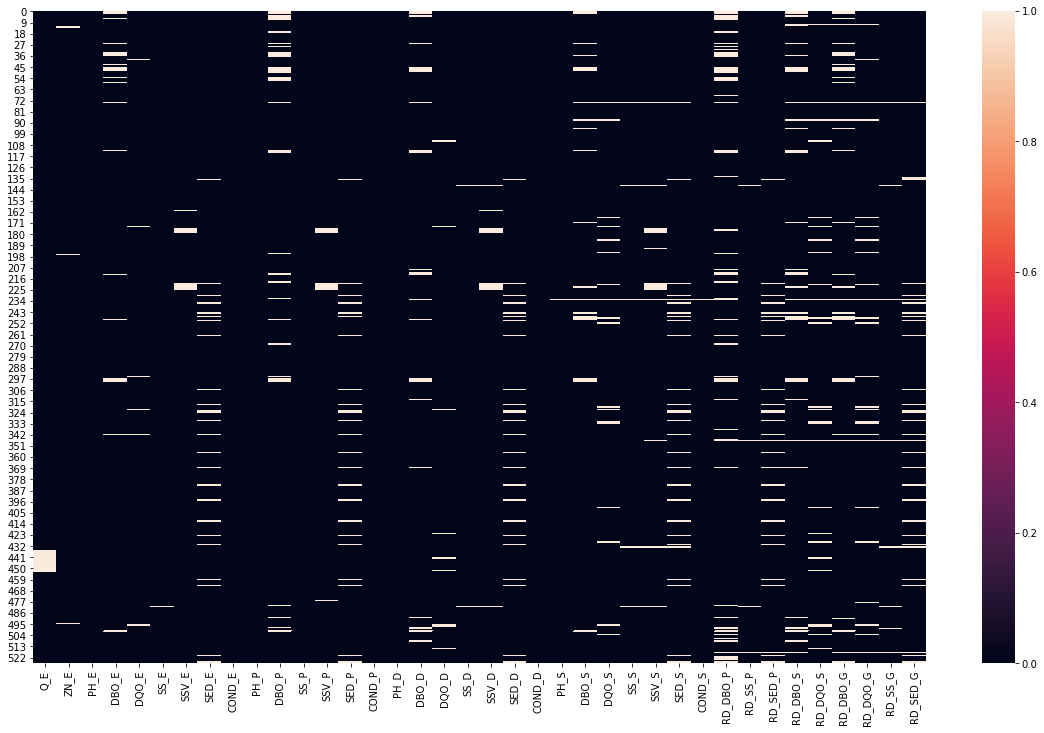

In [13]:
# checking for missing values 


print(Data.isna().sum())
plt.figure(figsize = (20,12))
sns.heatmap(Data.isnull())
plt.show()

In [14]:
# Replacing the null values with mean-value of respective column

df = Data.fillna(Data.mean())

In [15]:
df.isna()

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
523,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
524,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
525,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
print(df.isna().sum())

Q_E         0
ZN_E        0
PH_E        0
DBO_E       0
DQO_E       0
SS_E        0
SSV_E       0
SED_E       0
COND_E      0
PH_P        0
DBO_P       0
SS_P        0
SSV_P       0
SED_P       0
COND_P      0
PH_D        0
DBO_D       0
DQO_D       0
SS_D        0
SSV_D       0
SED_D       0
COND_D      0
PH_S        0
DBO_S       0
DQO_S       0
SS_S        0
SSV_S       0
SED_S       0
COND_S      0
RD_DBO_P    0
RD_SS_P     0
RD_SED_P    0
RD_DBO_S    0
RD_DQO_S    0
RD_DBO_G    0
RD_DQO_G    0
RD_SS_G     0
RD_SED_G    0
dtype: int64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q_E       527 non-null    float64
 1   ZN_E      527 non-null    float64
 2   PH_E      527 non-null    float64
 3   DBO_E     527 non-null    float64
 4   DQO_E     527 non-null    float64
 5   SS_E      527 non-null    float64
 6   SSV_E     527 non-null    float64
 7   SED_E     527 non-null    float64
 8   COND_E    527 non-null    float64
 9   PH_P      527 non-null    float64
 10  DBO_P     527 non-null    float64
 11  SS_P      527 non-null    float64
 12  SSV_P     527 non-null    float64
 13  SED_P     527 non-null    float64
 14  COND_P    527 non-null    float64
 15  PH_D      527 non-null    float64
 16  DBO_D     527 non-null    float64
 17  DQO_D     527 non-null    float64
 18  SS_D      527 non-null    float64
 19  SSV_D     527 non-null    float64
 20  SED_D     527 non-null    float6

In [18]:
df.shape

(527, 38)

In [19]:
df.describe()

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,37226.567780,2.359065,7.810057,188.714286,406.898273,227.444867,61.393217,4.593825,1478.620493,7.829981,...,1494.817490,39.085806,58.518738,90.554200,83.448049,67.817365,89.013646,77.856574,88.963391,99.086290
std,6521.467717,2.741657,0.246175,60.690777,119.674524,135.811306,12.284760,2.677945,394.898019,0.226925,...,387.537253,13.893820,12.753775,8.712181,8.462875,11.326846,6.782899,8.675122,8.158851,4.323828
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,...,683.000000,0.600000,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000
25%,32964.000000,0.900000,7.600000,148.000000,326.500000,170.000000,55.850000,3.200000,1201.000000,7.700000,...,1235.000000,31.150000,50.600000,88.900000,81.800000,63.400000,87.800000,74.250000,87.700000,99.200000
50%,36215.000000,1.500000,7.800000,185.000000,400.000000,196.000000,64.000000,4.500000,1406.000000,7.800000,...,1433.000000,39.085806,59.300000,93.300000,85.000000,69.300000,89.900000,78.700000,90.700000,99.700000
75%,41094.000000,3.000000,8.000000,222.000000,474.500000,242.000000,69.600000,5.500000,1672.000000,8.000000,...,1691.500000,47.650000,66.800000,95.700000,87.700000,75.000000,92.300000,83.200000,93.000000,100.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,8.500000,...,3950.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


In [20]:
df_corr = df.corr()
df_corr

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
Q_E,1.000000,0.036150,0.137804,-0.235947,-0.332162,-0.010152,-0.323816,-0.122108,-0.081707,0.154394,...,-0.070461,-0.055944,-0.027421,-0.053671,-0.022586,-0.070150,-0.079129,-0.171777,-0.020310,0.000899
ZN_E,0.036150,1.000000,-0.010403,-0.008020,0.080761,0.090619,-0.095286,0.079506,0.055507,0.000067,...,0.072122,-0.060081,0.048822,0.009717,0.064661,0.021265,0.029542,0.037546,0.113986,0.026874
PH_E,0.137804,-0.010403,1.000000,0.209100,0.180473,-0.047036,0.186794,0.054660,0.272851,0.902909,...,0.235087,-0.033695,-0.153563,-0.130990,0.190090,0.212801,0.114899,0.141368,0.061801,0.037078
DBO_E,-0.235947,-0.008020,0.209100,1.000000,0.547312,0.135572,0.251783,0.267851,0.215679,0.199085,...,0.208817,0.184481,-0.018715,-0.055230,0.156996,0.099273,0.304869,0.160729,0.017073,-0.040060
DQO_E,-0.332162,0.080761,0.180473,0.547312,1.000000,0.286550,0.257402,0.426201,0.309944,0.174184,...,0.279037,0.088528,0.124748,0.044152,0.065408,0.081419,0.110834,0.309972,0.107546,0.005401
SS_E,-0.010152,0.090619,-0.047036,0.135572,0.286550,1.000000,-0.543511,0.574159,0.083125,-0.100730,...,0.077919,0.184572,0.478534,0.127484,-0.006895,-0.039257,0.078504,0.151711,0.258030,0.005036
SSV_E,-0.323816,-0.095286,0.186794,0.251783,0.257402,-0.543511,1.000000,-0.136889,0.167270,0.222158,...,0.160678,-0.149070,-0.401026,-0.071937,0.090224,0.160756,0.015647,0.065129,-0.190045,0.027569
SED_E,-0.122108,0.079506,0.054660,0.267851,0.426201,0.574159,-0.136889,1.000000,0.187201,0.048221,...,0.156374,0.083140,0.322413,0.142258,0.037850,0.089816,0.085433,0.217107,0.198087,0.047134
COND_E,-0.081707,0.055507,0.272851,0.215679,0.309944,0.083125,0.167270,0.187201,1.000000,0.244974,...,0.903094,-0.031054,0.058665,0.044223,0.124338,0.082171,0.094609,0.048261,0.027110,0.053528
PH_P,0.154394,0.000067,0.902909,0.199085,0.174184,-0.100730,0.222158,0.048221,0.244974,1.000000,...,0.209045,-0.040274,-0.192209,-0.156534,0.156896,0.192872,0.072477,0.109467,0.029560,0.031496


<AxesSubplot:>

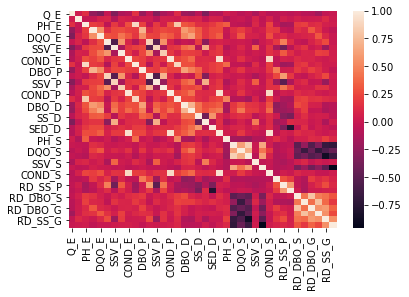

In [21]:
sns.heatmap(df_corr)

In [22]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(df)
Data_scaled_array = scaler.transform(df)
Data_scaled = pd.DataFrame(Data_scaled_array, columns = df.columns)

Data_scaled.sample(5)

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
173,-1.589429,-0.131091,-2.073898,-0.819919,-0.316979,0.416820,-0.985343,-0.221957,-1.235974,-1.455524,...,-1.097239,0.498118,0.995259,0.798009,-0.620715,-2.334495,-0.400452,-1.068039,-0.118191,0.095772
196,1.468001,-0.058073,0.365710,0.285087,-0.852271,-0.290715,-0.406842,-0.221957,-0.706221,0.308849,...,-1.061079,0.000000,0.712722,0.798009,0.491074,0.528684,0.617779,0.478075,0.703783,0.211520
257,0.636263,-0.284428,-0.040892,-1.149771,-1.563205,-0.732924,0.090180,-1.156396,-0.087753,0.308849,...,-0.164831,-1.216501,-1.068835,-1.787036,1.046968,0.369618,0.750592,0.189621,0.495222,0.049473
281,1.383430,0.124472,0.365710,-1.100294,-1.002822,-0.438118,-0.928308,-0.969508,1.083281,-0.132244,...,-0.180328,-0.157472,-0.582242,0.223555,0.526556,0.926347,0.175070,0.824220,0.188515,-0.367220
121,0.904095,-0.423162,2.398716,-0.902382,-0.877362,-0.143312,-0.300920,-0.483600,-0.807609,0.749942,...,-0.417950,-0.870696,0.979563,0.430358,0.325488,0.343107,-0.134826,0.028087,0.176247,0.211520


In [23]:
# K-Means Clustering

In [24]:
from sklearn.cluster import KMeans

nclusters = 4 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(Data_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(Data_scaled)
y_cluster_kmeans

array([0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 3, 3, 3, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 3, 2, 0, 1, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 0, 2, 1,

In [25]:
from sklearn import metrics
score = metrics.silhouette_score(Data_scaled, y_cluster_kmeans)
score

0.1257459355340864

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


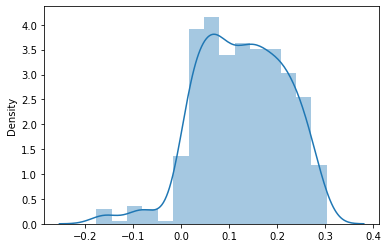

In [26]:
scores = metrics.silhouette_samples(Data_scaled, y_cluster_kmeans)
sns.distplot(scores);

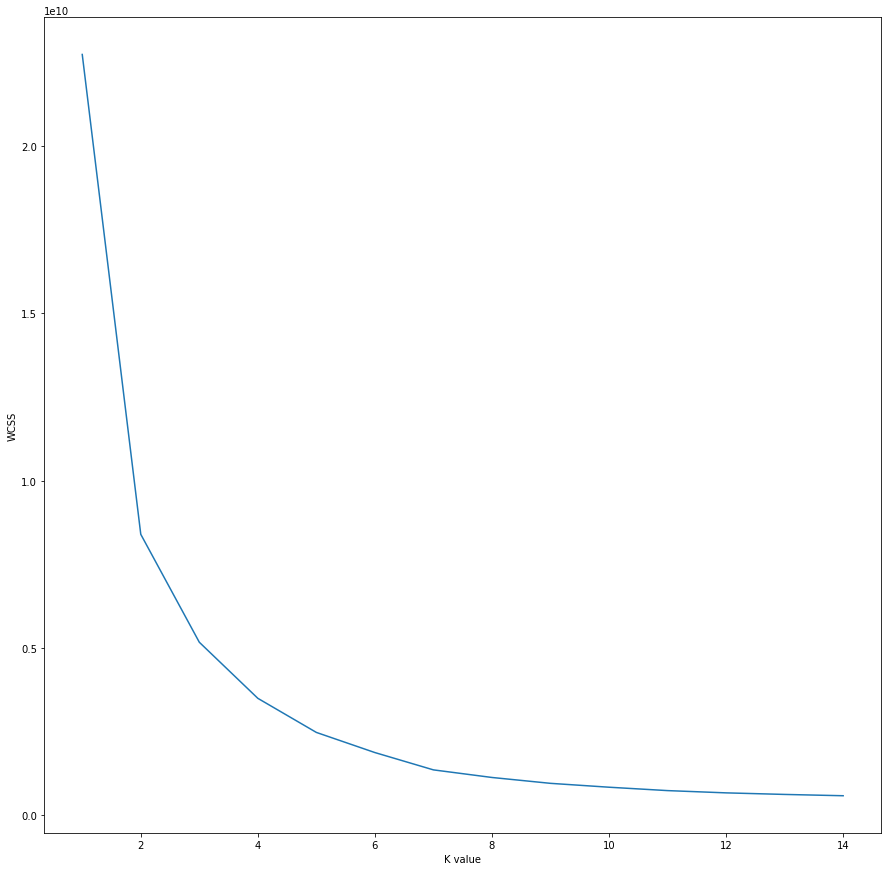

In [27]:
from sklearn.cluster import KMeans
wcss = [] 

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(df)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (15, 15))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

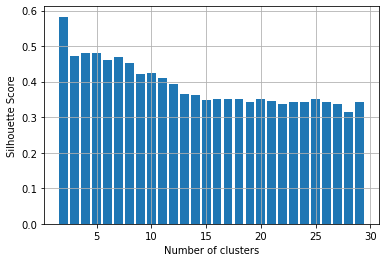

In [28]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2,30):
    silhouette_scores.append( 
        silhouette_score(df, KMeans(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

In [29]:
nclusters = 2 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(Data_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(Data_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,

In [30]:
score = metrics.silhouette_score(Data_scaled, y_cluster_kmeans)
score

0.1163653655723192

In [31]:
km.inertia_

17828.598319047745

In [32]:
km.cluster_centers_

array([[ 0.12756353, -0.03957303, -0.47204227, -0.47704135, -0.55126686,
        -0.09899492, -0.30635196, -0.34580369, -0.4863519 , -0.48345443,
        -0.52126133, -0.13741063, -0.27659202, -0.35036179, -0.49621605,
        -0.47817684, -0.58497585, -0.60182737, -0.32823179, -0.19286503,
        -0.28757242, -0.508153  , -0.09322532, -0.00789509, -0.12251614,
         0.00377837, -0.14590016,  0.06869342, -0.44812558, -0.05056416,
         0.01350217,  0.05363566, -0.25965787, -0.26464007, -0.1982028 ,
        -0.22972983, -0.08684164, -0.09253511],
       [-0.12902418,  0.04002616,  0.47744734,  0.48250365,  0.55757908,
         0.10012845,  0.30985981,  0.34976327,  0.49192082,  0.48899017,
         0.52722997,  0.13898404,  0.2797591 ,  0.35437357,  0.50189791,
         0.48365215,  0.59167405,  0.60871852,  0.33199017,  0.19507341,
         0.29086524,  0.51397155,  0.09429278,  0.0079855 ,  0.123919  ,
        -0.00382164,  0.14757077, -0.06947998,  0.45325679,  0.05114314,
   

In [33]:
Data_scaled.head()

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
0,1.055125,-0.313636,-0.040892,0.000000,0.000851,-0.452858,0.399800,-0.035069,1.600361,0.308849,...,1.304810,0.000000,0.022074,0.568227,-5.042384e-15,0.192879,0.000000,0.178083,-0.204069,0.118922
1,0.275880,0.233999,-0.447493,0.000000,0.301953,-0.099091,0.636089,0.712482,2.994449,-0.573338,...,2.828691,0.000000,0.171191,0.487804,-5.042384e-15,1.147272,0.000000,0.189621,0.384808,0.211520
2,-0.767054,0.964178,-0.854094,0.000000,1.012887,-0.305455,0.693124,-0.446222,0.474952,-0.573338,...,1.015531,0.000000,-0.025015,0.579716,-5.042384e-15,-1.318243,0.000000,-0.237291,-0.032314,-0.135724
3,-0.338215,0.416543,0.365710,0.268594,1.514723,-0.261234,0.342765,-0.035069,2.411467,-0.132244,...,0.891554,-0.431234,0.445881,0.545249,4.555911e-01,0.396129,0.175070,0.512690,0.078101,0.211520
4,-0.046440,-0.313636,0.772311,0.878821,0.745241,-0.379157,0.277581,-0.221957,1.600361,0.308849,...,1.614752,0.000000,0.328157,0.579716,-5.042384e-15,0.281249,0.455452,0.039625,-0.179533,0.095772


In [34]:
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(Data_scaled)
Data_scaled["type"] = clusters
Data_scaled["type"].unique()

array([1, 0], dtype=int32)

In [35]:
Data_scaled.head()

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G,type
0,1.055125,-0.313636,-0.040892,0.000000,0.000851,-0.452858,0.399800,-0.035069,1.600361,0.308849,...,0.000000,0.022074,0.568227,-5.042384e-15,0.192879,0.000000,0.178083,-0.204069,0.118922,1
1,0.275880,0.233999,-0.447493,0.000000,0.301953,-0.099091,0.636089,0.712482,2.994449,-0.573338,...,0.000000,0.171191,0.487804,-5.042384e-15,1.147272,0.000000,0.189621,0.384808,0.211520,1
2,-0.767054,0.964178,-0.854094,0.000000,1.012887,-0.305455,0.693124,-0.446222,0.474952,-0.573338,...,0.000000,-0.025015,0.579716,-5.042384e-15,-1.318243,0.000000,-0.237291,-0.032314,-0.135724,1
3,-0.338215,0.416543,0.365710,0.268594,1.514723,-0.261234,0.342765,-0.035069,2.411467,-0.132244,...,-0.431234,0.445881,0.545249,4.555911e-01,0.396129,0.175070,0.512690,0.078101,0.211520,1
4,-0.046440,-0.313636,0.772311,0.878821,0.745241,-0.379157,0.277581,-0.221957,1.600361,0.308849,...,0.000000,0.328157,0.579716,-5.042384e-15,0.281249,0.455452,0.039625,-0.179533,0.095772,1


In [36]:
Data_scaled.describe()

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G,type
count,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,...,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,5.270000e+02,527.000000
mean,1.896017e-17,1.011209e-16,1.802058e-15,-1.276651e-16,4.177556e-16,-1.264011e-18,-1.407266e-16,-4.055162e-17,2.367914e-16,3.531647e-15,...,8.035687e-17,6.903607e-16,9.355418e-16,9.724458e-16,-2.961999e-16,-7.267537e-16,1.208079e-15,-6.441190e-16,3.202680e-15,0.491461
std,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,...,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,1.000950e+00,0.500402
min,-4.171207e+00,-8.247608e-01,-3.700302e+00,-2.601122e+00,-2.725792e+00,-9.540285e-01,-3.926736e+00,-1.567549e+00,-2.097774e+00,-2.337711e+00,...,-2.772626e+00,-4.176748e+00,-9.519192e+00,-8.899995e+00,-5.869283e+00,-1.024335e+01,-6.767894e+00,-9.650639e+00,-1.451164e+01,0.000000
25%,-6.542419e-01,-5.326892e-01,-8.540940e-01,-6.714854e-01,-6.724460e-01,-4.233775e-01,-4.516558e-01,-5.209775e-01,-7.036861e-01,-5.733376e-01,...,-5.717180e-01,-6.214836e-01,-1.900525e-01,-1.949237e-01,-3.903613e-01,-1.790973e-01,-4.161325e-01,-1.549963e-01,2.632337e-02,0.000000
50%,-1.552609e-01,-3.136355e-01,-4.089158e-02,-6.125831e-02,-5.769671e-02,-2.317535e-01,2.123981e-01,-3.506937e-02,-1.840716e-01,-1.322443e-01,...,0.000000e+00,6.131551e-02,3.154674e-01,1.835576e-01,1.310200e-01,1.307990e-01,9.731594e-02,2.130519e-01,1.420715e-01,0.000000
75%,5.935944e-01,2.339987e-01,7.723108e-01,5.489687e-01,5.654166e-01,1.072736e-01,6.686806e-01,3.387061e-01,4.901601e-01,7.499423e-01,...,6.169888e-01,6.499354e-01,5.912055e-01,5.029013e-01,6.347273e-01,4.849662e-01,6.165335e-01,4.952222e-01,2.115204e-01,1.000000
max,3.507822e+00,1.136923e+01,3.618519e+00,4.111375e+00,4.467193e+00,1.312296e+01,1.923457e+00,1.173886e+01,4.439231e+00,2.955409e+00,...,2.882736e+00,2.949477e+00,1.085236e+00,1.330829e+00,2.561187e+00,1.178544e+00,2.335720e+00,1.280392e+00,2.115204e-01,1.000000


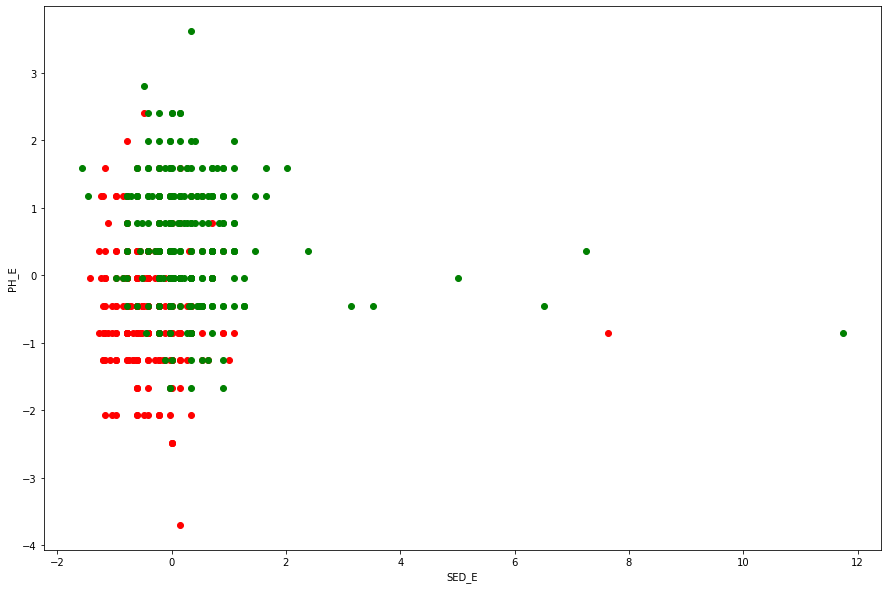

In [37]:
plt.figure(figsize = (15, 10))
plt.scatter(Data_scaled["SED_E"][Data_scaled["type"] == 0], Data_scaled["PH_E"][Data_scaled["type"] == 0], color = "red")
plt.scatter(Data_scaled["SED_E"][Data_scaled["type"] == 1], Data_scaled["PH_E"][Data_scaled["type"] == 1], color = "green")
plt.xlabel('SED_E')
plt.ylabel('PH_E')
plt.show()

In [38]:
kmeans.cluster_centers_

array([[ 1.35739469e-01, -3.85540731e-02, -4.58112947e-01,
        -4.86048857e-01, -5.62376072e-01, -1.54987155e-01,
        -2.87319923e-01, -3.22233251e-01, -4.80934730e-01,
        -4.63064272e-01, -5.32803131e-01, -1.78369920e-01,
        -2.56992707e-01, -3.35177158e-01, -4.90012937e-01,
        -4.58525272e-01, -5.82061031e-01, -5.96825697e-01,
        -3.28405606e-01, -1.75755712e-01, -2.82007344e-01,
        -4.99838175e-01, -8.27966622e-02, -1.32274713e-02,
        -1.31358384e-01, -7.90781167e-04, -1.30690139e-01,
         6.63974059e-02, -4.42997957e-01, -7.24328763e-02,
        -1.07059470e-04,  5.45284980e-02, -2.48694467e-01,
        -2.48043718e-01, -1.94685132e-01, -2.26800771e-01,
        -8.80165574e-02, -8.91196619e-02],
       [-1.40456284e-01,  3.98937900e-02,  4.74031930e-01,
         5.02938586e-01,  5.81918098e-01,  1.60372809e-01,
         2.97304013e-01,  3.33430545e-01,  4.97646747e-01,
         4.79155309e-01,  5.51317525e-01,  1.84568102e-01,
         2.65

In [39]:
# K-means++

In [40]:
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,30):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

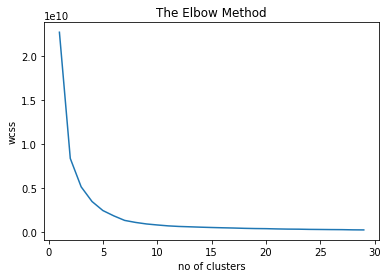

In [41]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,30), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [42]:
#Model Build   (K-means)
kmeansmodel = KMeans(n_clusters= 5, random_state=0)
y_kmeans= kmeansmodel.fit_predict(df)

In [43]:
score = metrics.silhouette_score(df, y_kmeans)
score

0.48112836657156166

In [44]:
# silhouette score value near to 0.5 or better provides good evidence of the reality of the clusters in the data


In [45]:
# Agglomerative Clustering

In [46]:
df.head()

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
0,44101.0,1.5,7.8,188.714286,407.0,166.0,66.3,4.5,2110.0,7.9,...,2000.0,39.085806,58.8,95.5,83.448049,70.0,89.013646,79.4,87.3,99.6
1,39024.0,3.0,7.7,188.714286,443.0,214.0,69.2,6.5,2660.0,7.7,...,2590.0,39.085806,60.7,94.8,83.448049,80.8,89.013646,79.5,92.1,100.0
2,32229.0,5.0,7.6,188.714286,528.0,186.0,69.9,3.4,1666.0,7.7,...,1888.0,39.085806,58.2,95.6,83.448049,52.9,89.013646,75.8,88.7,98.5
3,35023.0,3.5,7.9,205.000000,588.0,192.0,65.6,4.5,2430.0,7.8,...,1840.0,33.100000,64.2,95.3,87.300000,72.3,90.200000,82.3,89.6,100.0
4,36924.0,1.5,8.0,242.000000,496.0,176.0,64.8,4.0,2110.0,7.9,...,2120.0,39.085806,62.7,95.6,83.448049,71.0,92.100000,78.2,87.5,99.5


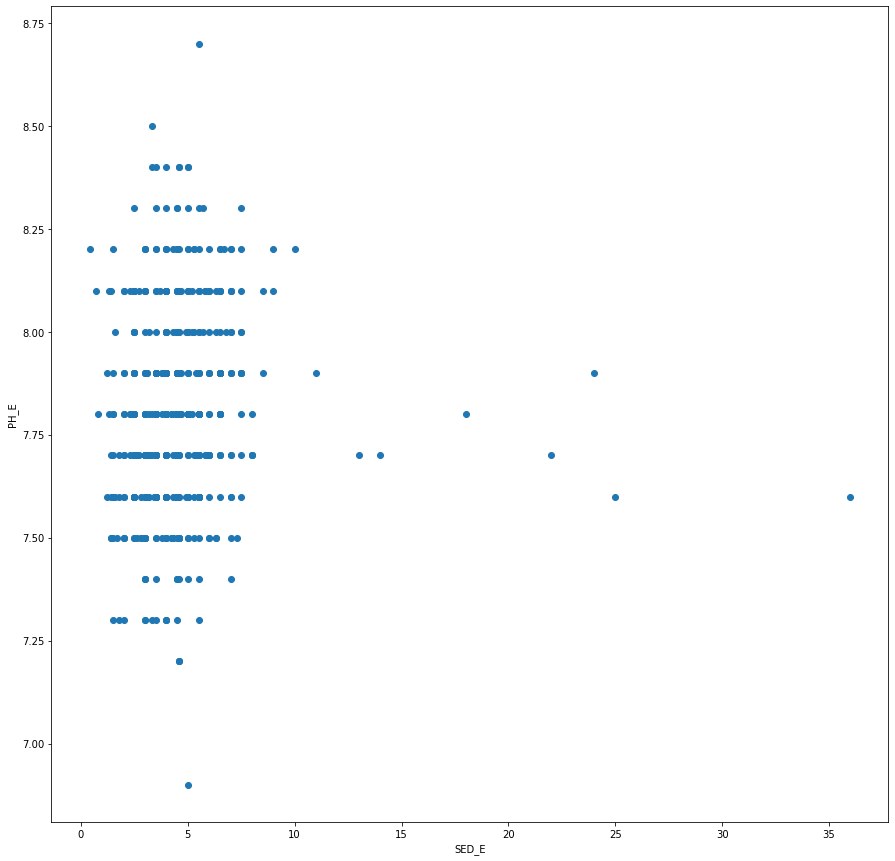

In [47]:
plt.figure(figsize = (15, 15))
plt.scatter(df["SED_E"], df["PH_E"])
plt.xlabel('SED_E')
plt.ylabel('PH_E')
plt.show()

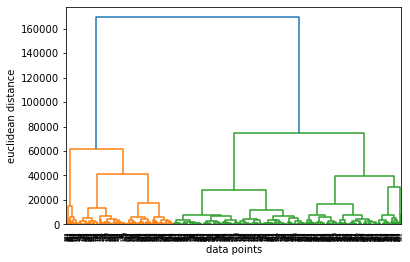

In [48]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [49]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(df)
Data["label"] = cluster

In [50]:
Data.label.value_counts()

2    209
0    168
1    150
Name: label, dtype: int64

In [51]:
dataWithoutTypes= df[['SED_E','PH_E']]

In [52]:
dataWithoutTypes.head()

,SED_E,PH_E
0,4.5,7.8
1,6.5,7.7
2,3.4,7.6
3,4.5,7.9
4,4.0,8.0


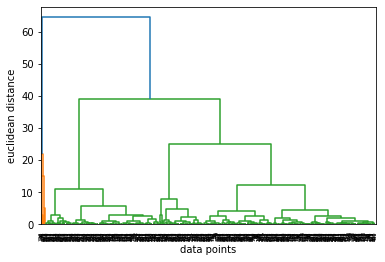

In [53]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(dataWithoutTypes, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [54]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(dataWithoutTypes)
dataWithoutTypes["label"] = cluster

<ipython-input-54-60fac4c6e0a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWithoutTypes["label"] = cluster


In [55]:
dataWithoutTypes.label.value_counts()

0    520
1      7
Name: label, dtype: int64

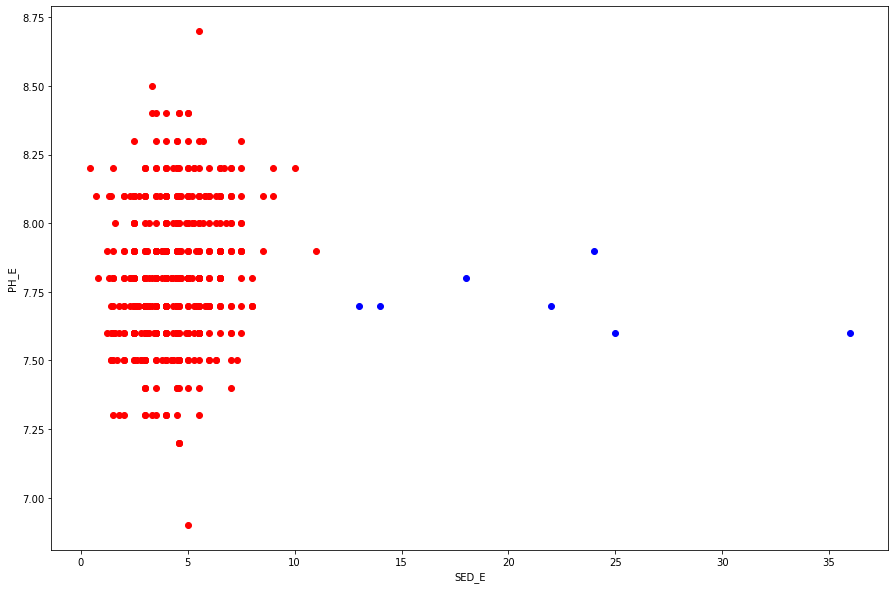

In [56]:
# Data after hierarchical clustering

plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutTypes["SED_E"][dataWithoutTypes.label == 0], dataWithoutTypes["PH_E"][dataWithoutTypes.label == 0], color = "red")
plt.scatter(dataWithoutTypes["SED_E"][dataWithoutTypes.label == 1], dataWithoutTypes["PH_E"][dataWithoutTypes.label == 1], color = "blue")
plt.xlabel("SED_E")
plt.ylabel("PH_E")
plt.show()